# MATH 756/856–Final Take-Home Exam
#### Alex Beckwith

In [60]:
# std library imports
from functools import partial
from itertools import chain

# 3rd party imports
from numpy import array, linspace
from math import sqrt, ceil
from scipy import stats
from scipy.stats import norm, chi2
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

#local imports
from utils import pathsearch # utility functions made during master's project

In [61]:
sns.set_theme(style="darkgrid")

In [62]:
alpha = 0.05
ci = 1 - alpha
nvals = 100_000

In [63]:
# utility functions
text_to_int_array = lambda text: array([int(x) for x in text.split(" ")])
isbetween = lambda x, interval: True if (x > min(interval) and x < max(interval)) else False
boot_ci = lambda rv, ci, size: sum([isbetween(x, rv.interval(ci)) for x in rv.rvs(size)])/size
boot_est = partial(boot_ci, ci=ci, size=nvals)

In [64]:
one = array([5.33, 4.25, 3.15, 3.70, 1.61, 6.40, 3.12, 6.59, 3.53, 4.74, 0.11, 1.60, 5.49, 1.72, 4.15, 2.30])

# 1
The following 16 random samples; [one] came from normal distribution with mean $μ$ and variance $σ^{2}$, i.e. $$X_{1}, X_{2}, ··· ,X_{16} ∼ N(μ, σ^{2})$$

In [65]:
n = len(one)
avg = one.mean()
var = one.var(ddof=1)
std = sqrt(var)
adj_var = var / n
adj_std = std / sqrt(n)

keys = ["n", "mean", "std", "var", "adj_std", "adj_var"]
vals = [n, avg, std, var, adj_std, adj_var]
print(f"for the above vector of samples,")
for x, y in zip(keys, vals):
    print(f"{x} = {round(y, 6)}")

for the above vector of samples,
n = 16
mean = 3.611875
std = 1.847157
var = 3.41199
adj_std = 0.461789
adj_var = 0.213249


## 1a
#### Find the maximum likelihood estimates of $μ$ and $σ^{2}$, denoted with $\hat{μ}$ and $\hat{σ}^{2}$.

density function:
$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{\left(x - \mu\right)^{2}}{2\sigma^{2}}}
$$

likelihood func generally
$$
L(\mu, \sigma^{2}, x_{n}) = \prod_{i=1}^{n} f_{X}\left(x_{i}, \mu, \sigma^{2}\right)
$$

expand likelihood func
$$
L(\mu, \sigma^{2}, x_{n}) = \prod_{i=1}^{n}\left[\left(\frac{1}{\sqrt{2\pi}\sigma}\right)
e^{-\left(\frac{1}{2\sigma^{2}}\right)
\left(x_{i} - \mu\right)^{2}}\right]
$$

simplify product term
$$
L(\mu, \sigma^{2}, x_{n}) = \left(2\pi\sigma^{2}\right)^{-n/2}
e^{-\left(\frac{1}{2\sigma^{2}}\right)
\sum_{i = 1}^{n}\left(x_{i} - \mu\right)^{2}}
$$

loglik
$$
l(\mu, \sigma^{2}, x_{n}) = -\frac{n}{2}log(2\pi)-\frac{n}{2}log(\sigma^{2})
-\left(\frac{1}{2\sigma^{2}}\right)
\sum_{i = 1}^{n}\left(x_{i} - \mu\right)^{2}
$$

partial $\mu$
$$
\frac{\partial}{\partial\mu}l(\mu, \sigma^{2}, x_{n}) = 0 
= -\left(\frac{1}{\sigma^{2}}\right)
\sum_{i = 1}^{n}\left(x_{i} - n\mu\right)
$$

which implies
$$
\sum_{i = 1}^{n}x_{i} - n\mu = 0
$$
$$
\hat{\mu} = \bar{x} = 3.611875
$$

partial $\sigma^{2}$
$$
\frac{\partial}{\partial\sigma^{2}}= -\frac{n}{2\sigma^{2}}
-\left(\frac{1}{2}\right)
\sum_{i = 1}^{n}\left(x_{i} - \mu\right)^{2}\left(\frac{1}{(\sigma^{2})^{2}}\right)
$$

partial $\sigma^{2}$
$$
0 = -\frac{n}{2}
-\left(\frac{1}{2}\right)
\sum_{i = 1}^{n}\left(x_{i} - \mu\right)^{2}\left(\frac{1}{\sigma^{2}}\right)
$$
$$
\sigma^{2} = -\frac{1}{n}
\sum_{i = 1}^{n}\left(x_{i} - \mu\right)^{2} 
$$
$$
\hat{\sigma}^{2}= 3.19874
$$
$$
{s}^{2} = \hat{\sigma}^{2} / n  = 0.1999
$$

## 1b
Based on above $\hat{μ}$ and $\hat{σ}^{2}$, construct $95$% confidence intervals for $μ$ and $σ^{2}$ separately.

In [66]:
# initializing random variable
mu_rv = norm(loc=avg, scale=adj_std)

# calculating 95% confidence interval
mu_intv = mu_rv.interval(ci)

# generating estimate for p from interval
mu_est = boot_est(mu_rv)

In [67]:
# initializing random variable
c2_rv = chi2(n-1, scale=adj_var)

# calculating 95% confidence interval
c2_intv = [x/n for x in c2_rv.interval(ci)]

# generating estimate for p from interval
c2_est = boot_est(c2_rv)

Text(0.5, 0.98, 'Estimates for $\\mu$ & $\\sigma^{2}$ based on the data from $1$')

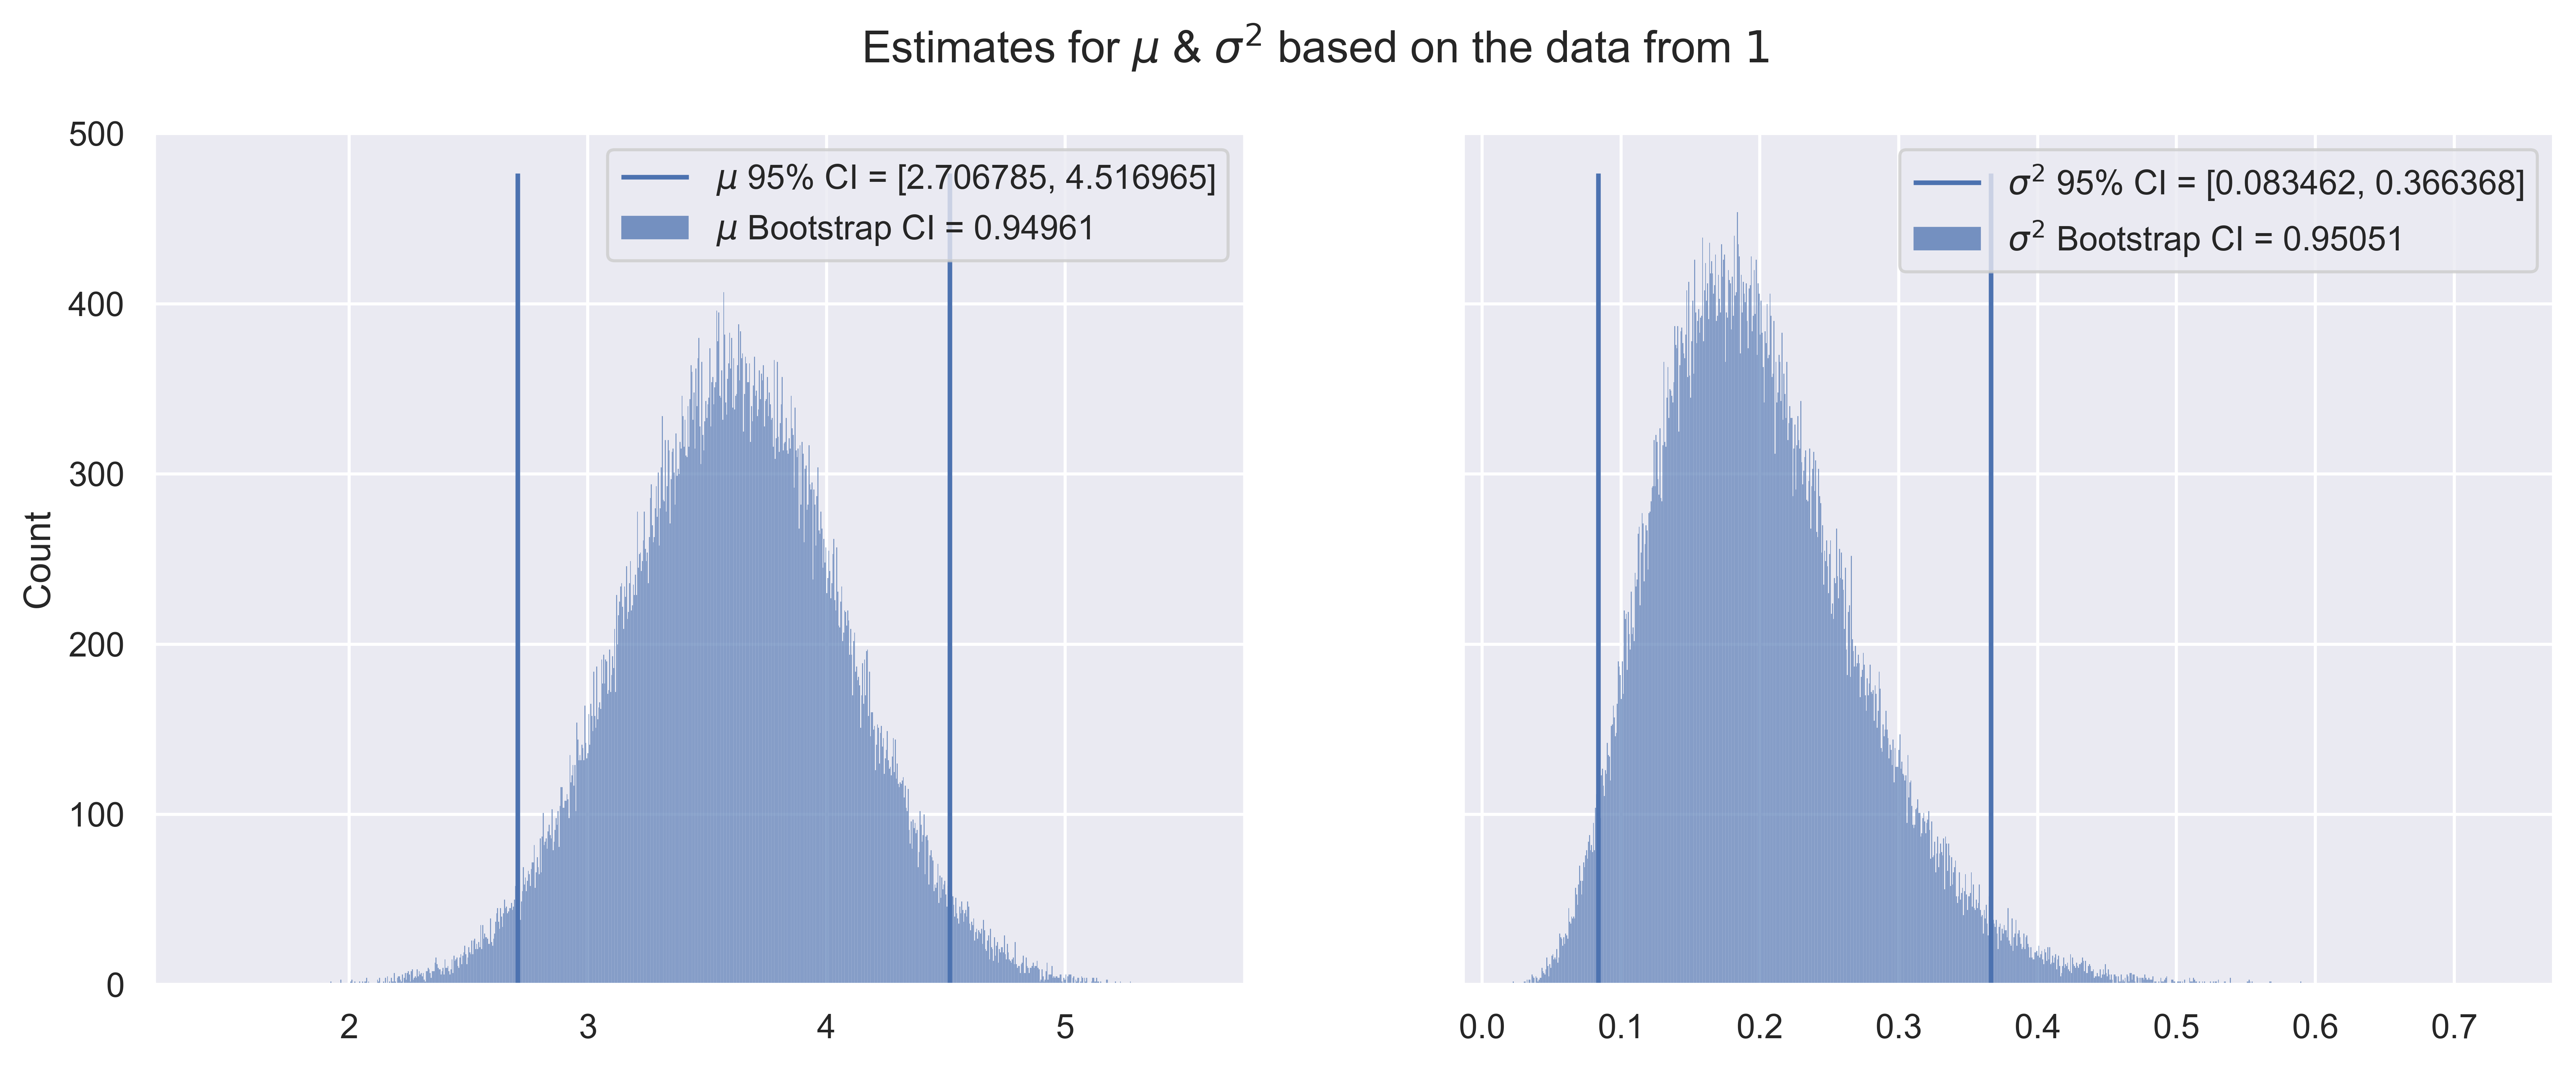

In [68]:
bins = nvals // 100
mu_vals = mu_rv.rvs(nvals)
c2_vals = [x/n for x in c2_rv.rvs(nvals)]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5), dpi=600, sharey=True)
plot = sns.histplot(mu_vals,
                    ax=axs[0],
                    bins=bins,
                    label=f"$\mu$ Bootstrap CI = {round(mu_est,6)}"
                    )
plot = sns.histplot(c2_vals,
                    ax=axs[1],
                    bins=bins,
                    label=f"$\sigma^{2}$ Bootstrap CI = {round(c2_est, 6)}"
                    )
mu_ylims = axs[0].get_ylim()
c2_ylims = axs[1].get_ylim()
axs[0].vlines(mu_intv, ymin=mu_ylims[0], ymax=mu_ylims[-1], label=f"$\mu$ 95% CI = {[round(x,6) for x in mu_intv]}")
axs[1].vlines(c2_intv, ymin=c2_ylims[0], ymax=c2_ylims[-1], label=f"$\sigma^{2}$ 95% CI = {[round(x,6) for x in c2_intv]}")
axs[0].legend()
axs[1].legend()
plt.suptitle("Estimates for $\mu$ & $\sigma^{2}$ based on the data from $1$")

# 1c
#### Based on part (b) and the duality of confidence intervals and the hypothesis tests, carry out a hypothesis test of $H_{0}: μ = 4$ versus $H_{1}: μ \neq 4$ at $α = 0.05$.


- $4$ is within the bounds of the $95$% confidence interval for $\mu$. Therefore, we cannot reject the null hypothesis that the population mean is $4$.

# 2
#### Suppose that $X_{1}, X_{2}, ..., X_{n}$ are independent Poisson random variables with mean $θ$ and that $θ$ has a gamma prior distribution.


## 2a
Show that the posterior distribution of $\theta$ is also gamma.

$$
\theta \sim Gamma(\alpha, \beta)
$$

i.i.d., so likelihood can be written
$$
p(y | \lambda) = \prod_{i=1}^n(p(y_{i} | \lambda)) 
$$

$$
\prod_{i=1}^n(p(y_{i} | \lambda)) = \prod_{i=1}^n\lambda^{y_{i}}\frac{e^{-\lambda}}{y_{i}!}
$$

$$
\prod_{i=1}^n(\lambda^{y_{i}}\frac{e^{-\lambda}}{y_{i}!}p(y_{i} | \lambda))
\propto \lambda^{\sum_{i=1}^{n}y_{i}}e^{-n\lambda}
$$


$$
\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_{i}
$$
so
$$
\lambda^{\sum_{i=1}^{n}y_{i}}e^{-n\lambda} = \lambda^{n\bar{y}}e^{-n\lambda}
$$

posterior can be written as 
$$
p(\lambda | y) \propto p(y | \lambda)p(\lambda) 
\propto \lambda^{n\bar{y}}e^{-n\lambda}\lambda^{\alpha - 1}e^{-\beta\lambda}
$$
$$
= \lambda^{\alpha + n\bar{y} - 1}e^{-(\beta + n)\lambda}
$$

therefore we have 
$$
\lambda | Y \propto Gamma(\alpha + n\bar{y}, \beta + n)
$$

## 2b
#### Determine the Bayes estimate of θ and show that it is a weighted average of the prior mean and the sample mean X.

$$
f_{\Theta | x}(\Theta | x) 
= \frac{f_{x | \Theta}(x | \Theta)f_{\Theta}(\Theta)}
{\int f_{x | \Theta}(x | \Theta)f_{\Theta}(\Theta) d\theta}
$$

$$
E(\Theta | X = x) = \int\lambda^{\alpha + n\bar{y} - 1}e^{-(\beta + n)\lambda}d\theta
$$

$$
\frac{\alpha}{\beta} = \int\lambda^{\alpha + n\bar{y} - 1}e^{-(\beta + n)\lambda}d\theta
$$

$$
\theta = \frac{\alpha e^{(\beta + n)\lambda}}{\beta\lambda^{\alpha + n\bar{y} - 1}}
$$

# 3. 
(16pts, Problem 46, page 322) The data of this exercise were gathered as part of a study to estimate the population size of the bowhead whale (Raftery and Zeh 1993). The statistical procedures for estimating the population size along with an assessment of the variability of the estimate were quite involved, and this problem deals with only one aspect of the problem– a study of the distribution of whale swimming speeds. Pairs of sightings and corresponding locations that could be reliably attributed to the same whale were collected, this providing an estimate of velocity for each whale. The velocities, v1, v2, ..., v210 (km/h) were converted into times t1, t2, · · · , t210 to swim 1 km; ti = 1/vi. The distribution of the ti was then fit by an exponential distribution and a gamma distribution. The times (or the data observations) are contained in the file whales.txt posted at Canvas.

In [69]:
whales = pathsearch("whales.txt")
text = whales.read_text().split("\n")
data = array([float(x) for x in text if x != ""])
print(f"Number of observations = {(n := len(data))}")

Number of observations = 210


(Shown with kernel density estimator for initial sense of distribution)


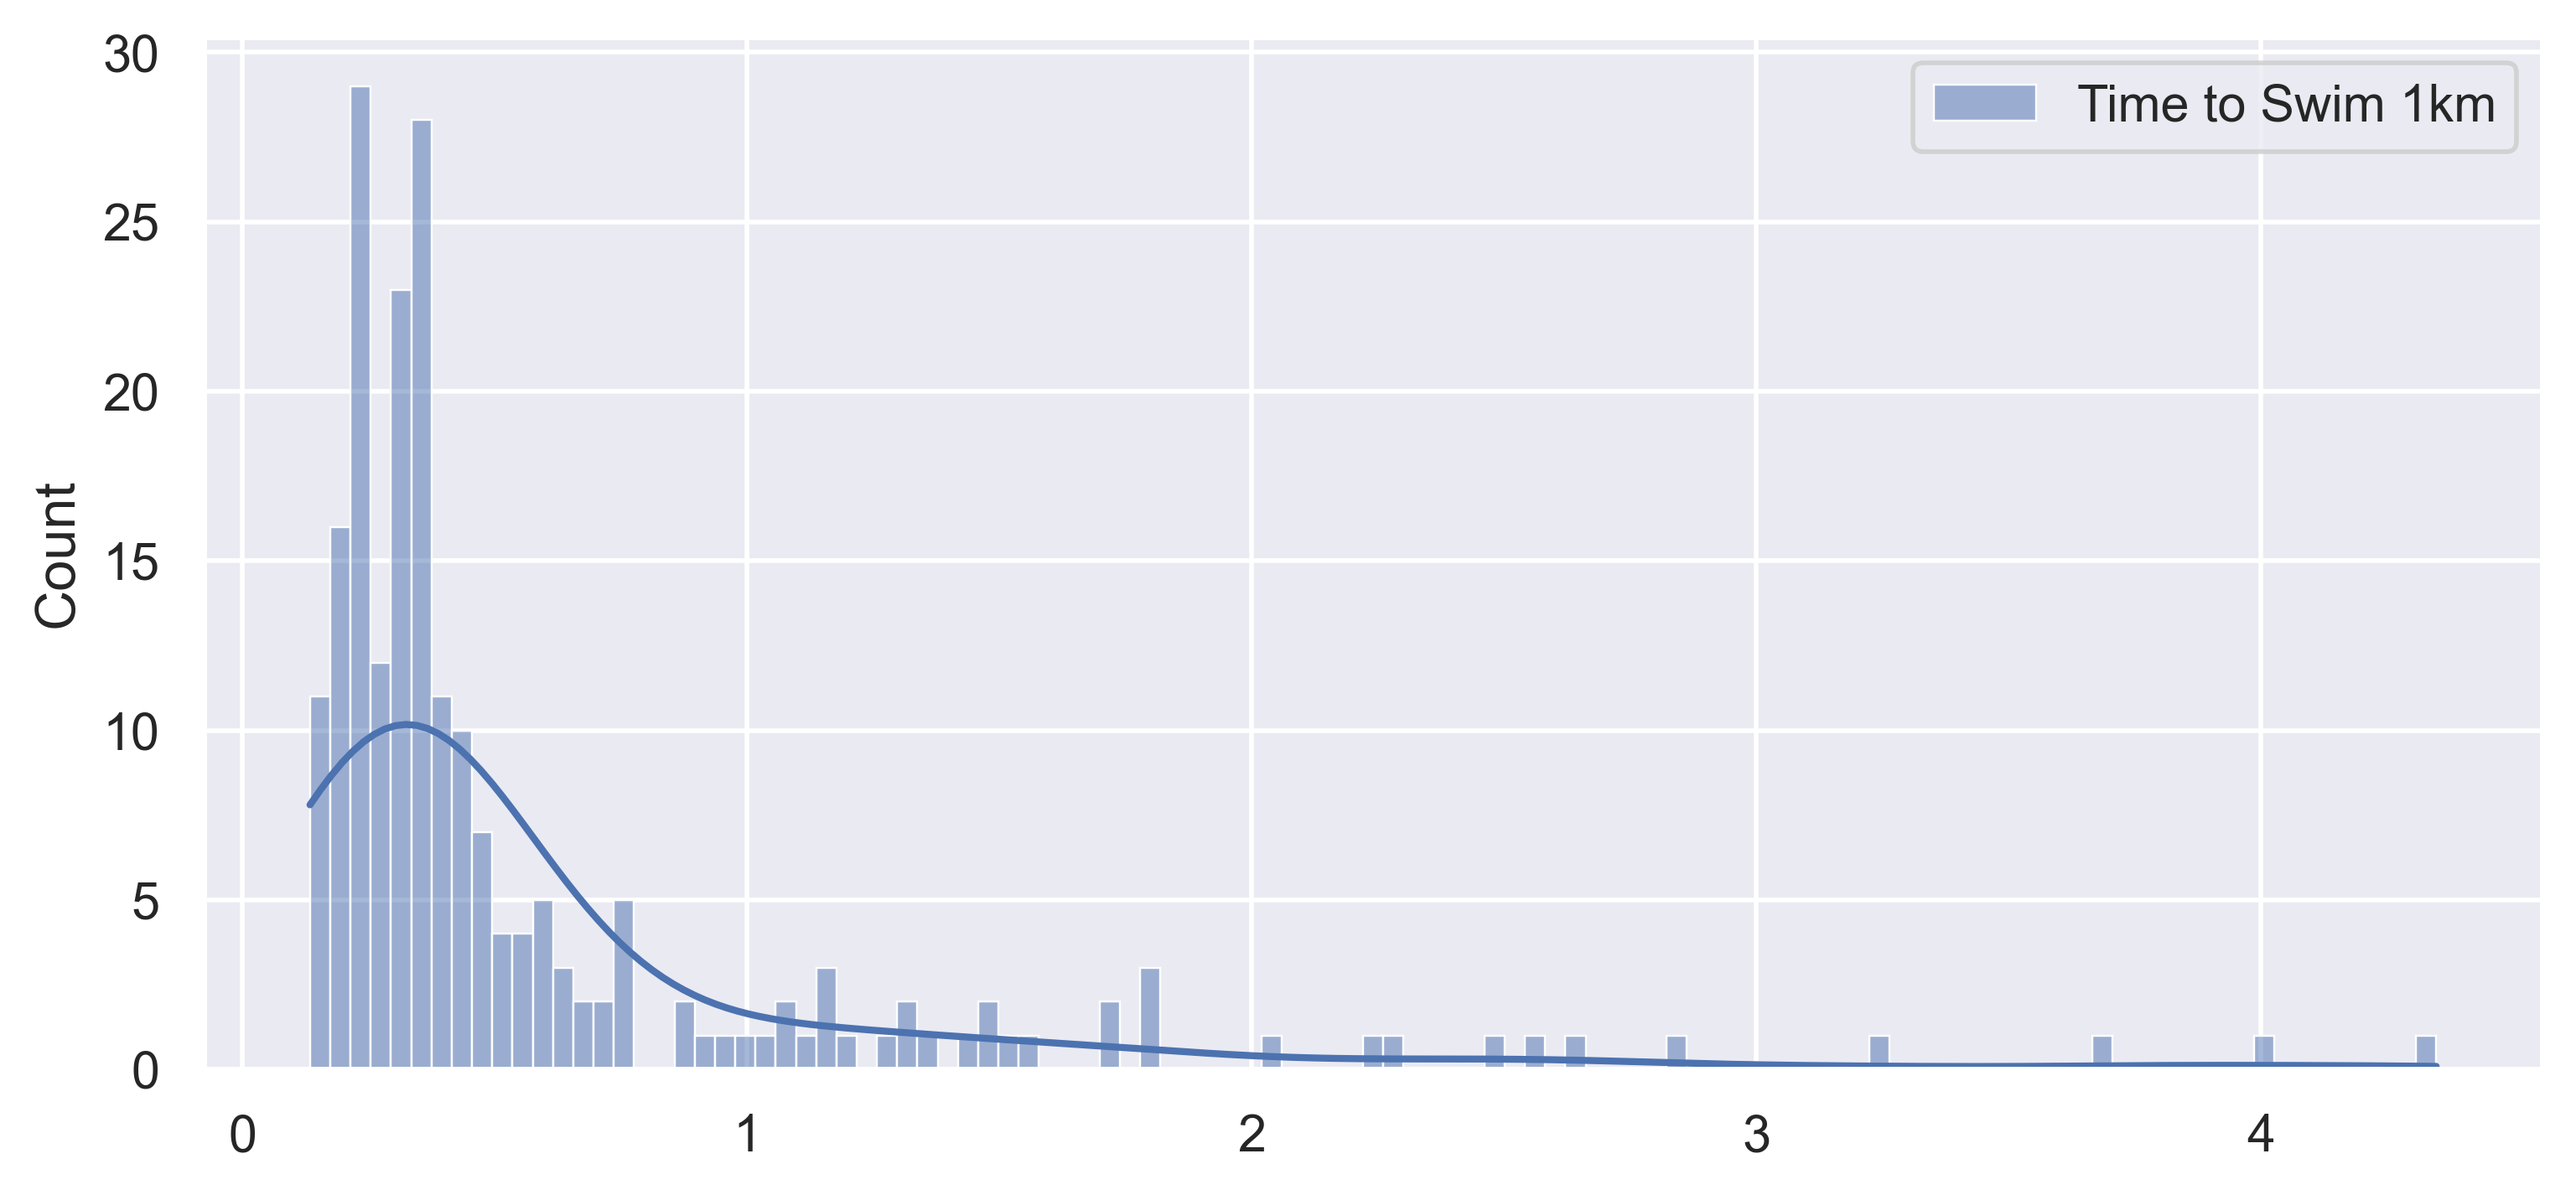

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,4), dpi=400)
sns.histplot(data, bins=n//2, label="Time to Swim 1km", ax=ax, kde=True)
plt.legend()
print("(Shown with kernel density estimator for initial sense of distribution)")

## 3a
Using Python to make a histogram of the remaining 210 values of ti. Does it appear that an exponential distribution would be a plausible model to fit? In specific, using Python to construct a probability plot of the data against the quantiles of an exponential distribution to assess qualitatively whether the exponential is a reasonable model.

Text(0.5, 1.0, 'Whale Data Q-Q Plot with Exponential Distribution')

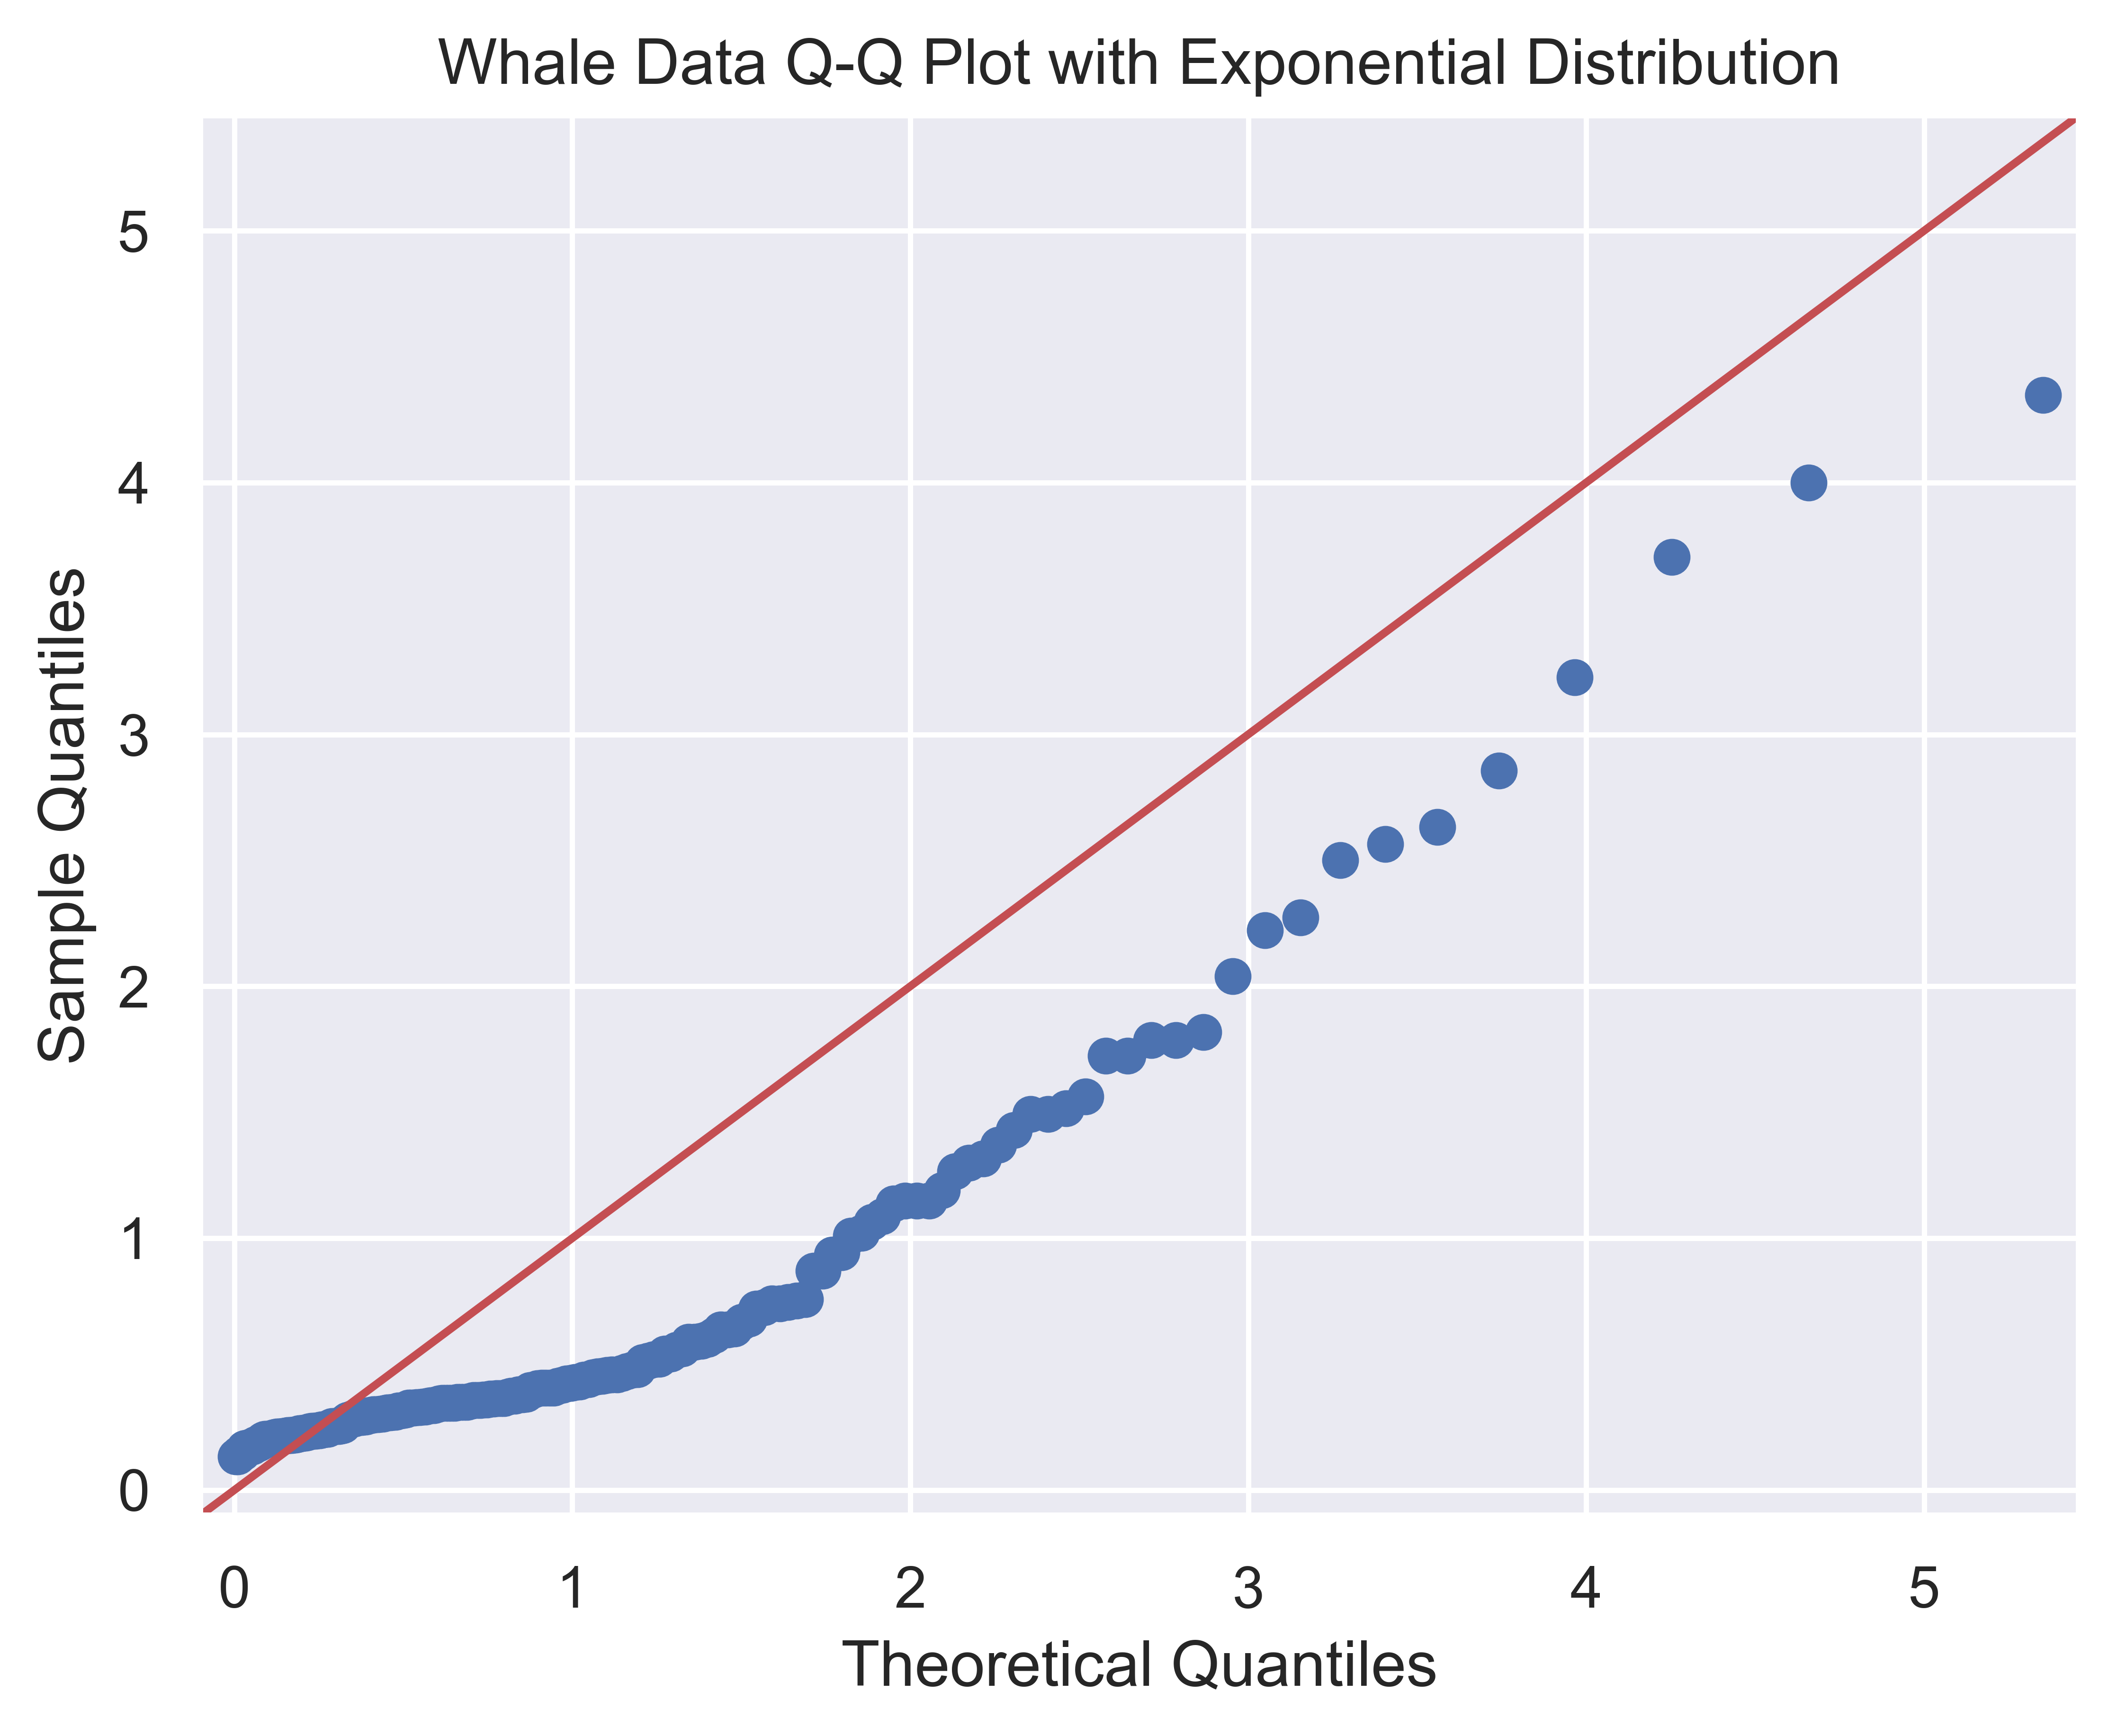

In [94]:
dist = stats.distributions.expon
plt.rcParams["figure.dpi"] = 800
fig = sm.qqplot(data, dist=dist, line='45')
plt.title("Whale Data Q-Q Plot with Exponential Distribution")

- The whale data Q-Q plot with an exponential distribution shows an initial deviation before becoming approximately linear. This shows that the experimental distribution may have asymptotic tail behavior like an exponential distribution, but suggests that the lower values wouldn't be well represented by an exponential distribution.

## 3b
Fit the parameters of the exponential and gamma distribution by method of moments.

In [95]:
mean = data.mean()
var =  data.var()

#### Exponential 
$E[X] = \frac{1}{\lambda}$

$\hat{\lambda} = \frac{1}{\bar{x}}$

In [96]:
lamhat = 1 / mean
print("estimate for $\hat{\lambda}$ =", lamhat)

estimate for $\hat{\lambda}$ = 1.6501676098815181



#### Gamma
$E[X] = \frac{\alpha}{\beta} = x$

$VAR[X] = \frac{\alpha}{\beta^{2}} = v$


$\frac{x}{\beta} = v$

$\frac{x}{v} = \beta$

$\frac{x^{2}}{v} = \alpha$



In [97]:
alphat = (mean ** 2) / var
bethat = mean / var
print("estimate for alpha hat =", alphat)
print("estimate for beta hat =", bethat)

estimate for alpha hat = 0.7991740751385162
estimate for beta hat = 1.318771173450598


## 3d
Using Python to plot the exponential and gamma densities on top of the histogram. Do the fits look reasonable?

In [98]:
x = linspace(min(data), max(data), n)

In [99]:
gamma = stats.gamma(scale=1/bethat, a=alphat)
expon = stats.expon(scale=1/lamhat)


The estimates seem reasonable as prior distributions,
but I was hoping for more diffrentiation between the exponential and gamma distributions
to account for the small hump in the beginning of the distribution.



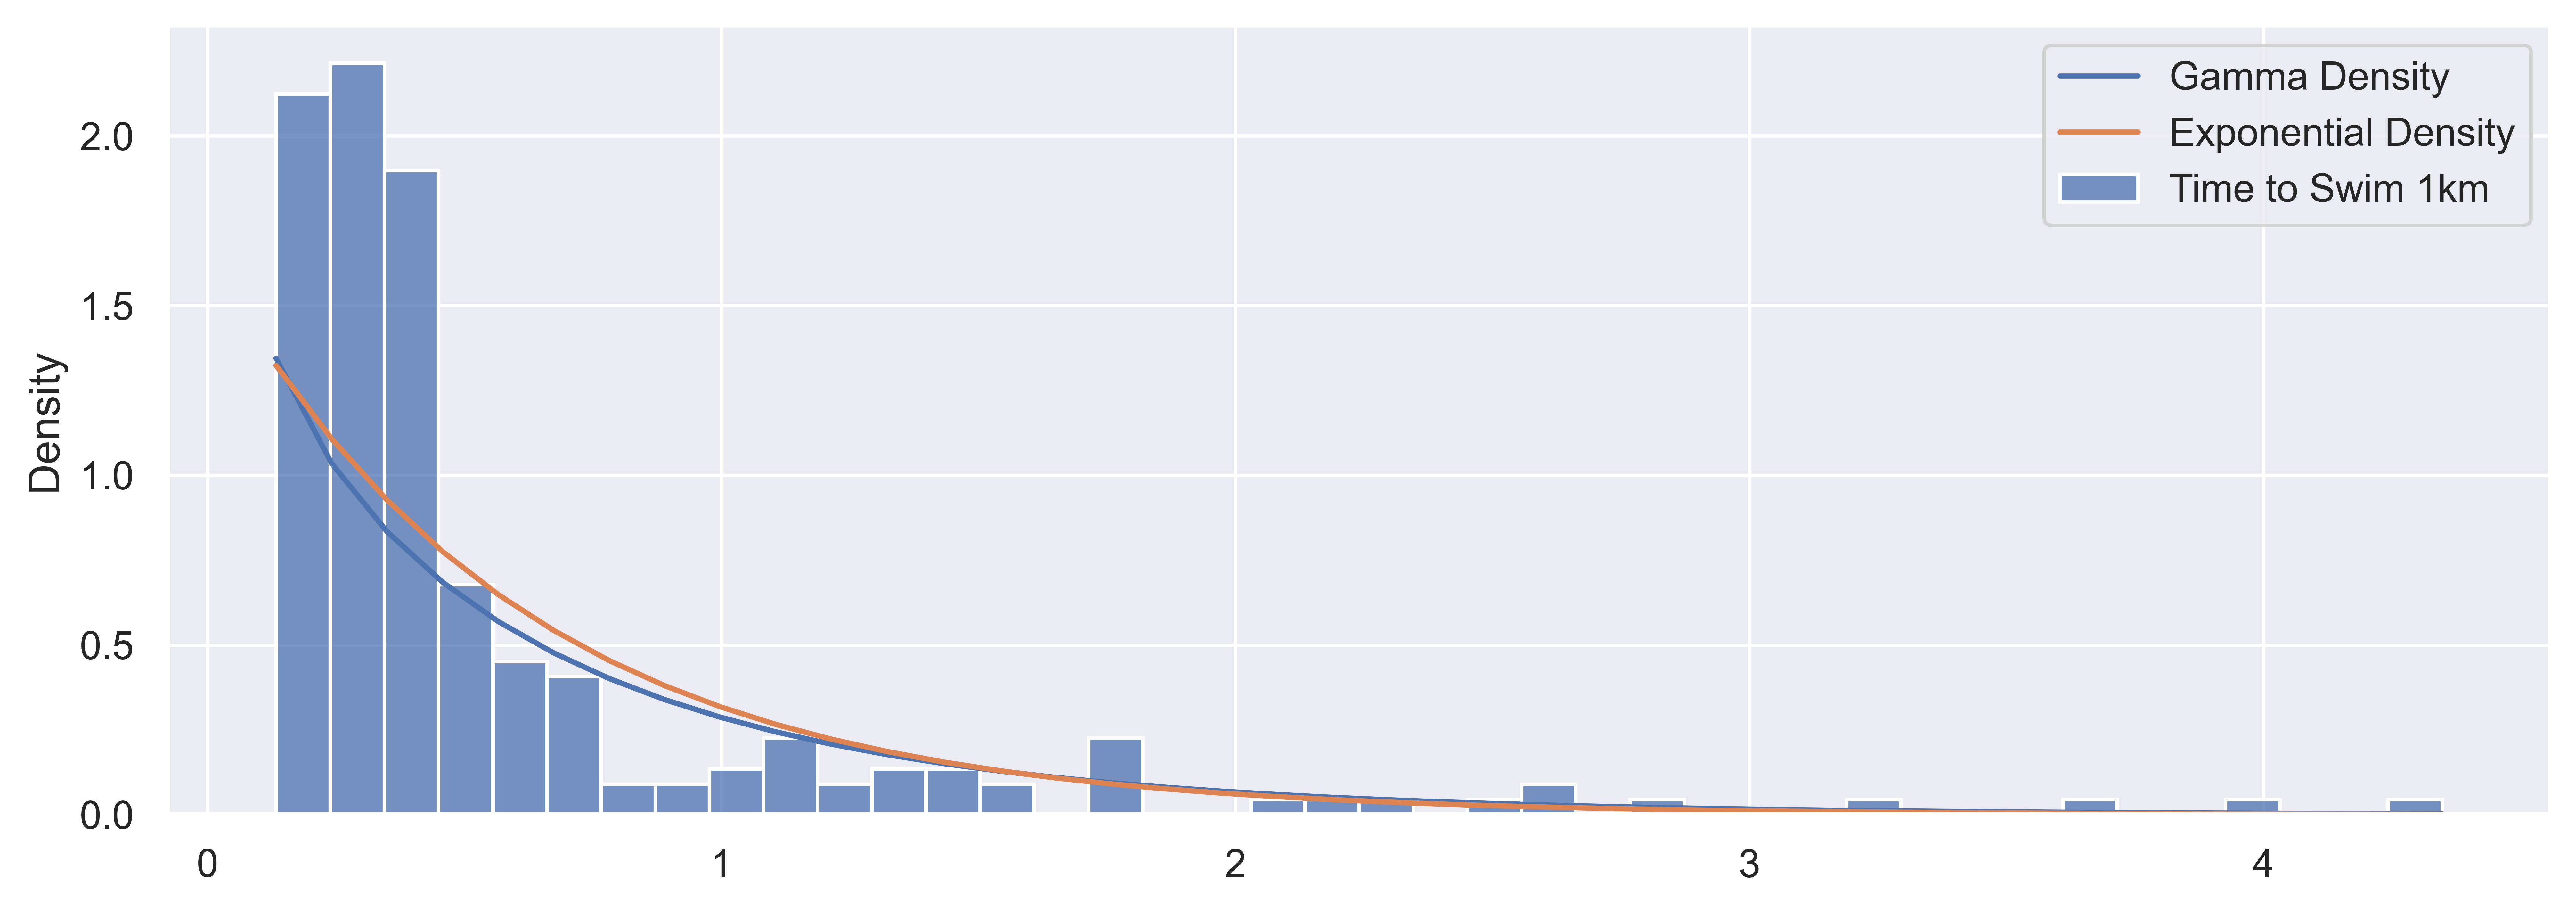

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4), dpi=800)
sns.histplot(data, bins=n, label="Time to Swim 1km", ax=ax, stat="density")
ax.plot(x, gamma.pdf(x), label = "Gamma Density")
ax.plot(x, expon.pdf(x), label = "Exponential Density")
plt.legend()
print("""
The estimates seem reasonable as prior distributions,
but I was hoping for more diffrentiation between the exponential and gamma distributions
to account for the small hump in the beginning of the distribution.
""")

# 4
#### Suppose that we are given a random sample $X_{1}, X_{2}, ..., X_{n}$ from the pdf $f(x) = θx^{θ−1}, x ∈ (0, 1)$, where $θ > 0$ is an unknown parameter. 

#### The null hypothesis $H_{0}: \theta= 1$ is to be tested against the alternative $H_{1} : θ > 1$.

# 4a 
#### Show that the family of uniformly most powerful tests have the rejection region of the form $\prod_{i=1}^{n} X_{i} > c_{0}$ for some constant c0.

likelihood function for $X_{n}$
$$
l(x | \theta) = \prod_{i=1}^{n} \theta x_{i}^{\theta - 1}
$$

likelihood ratio with some simplification
$$
L(x | \frac{1}{\theta_{1}}) = \frac{l(x|1)}{l(x|\theta_{1})} 
= \frac{\prod_{i=1}^{n} X_{i}^{1 - \theta_{1}}}
{\prod_{i=1}^{n} \theta_{1}^{-1} X_{i}^{1 - \theta_{1}}}
$$

$$
\theta_{1}^{-n} \prod_{i=1}^{n} X_{i}^{\theta_{1} - 1} < c
$$

take derivative, set to zero and solve
$$
0
=  \frac{n}{\sum_{i=1}^{n}(X_{i})} - \frac{n\theta_{1}}{\sum_{i=1}^{n}(X_{i})}
$$

take derivative, set to zero and solve
$$
\theta = 1
$$

The ratio only depends on the data through $\sum_{i=1}^{n} X_{i}$ so the family of UMP tests will be of the form $\prod_{i=1}^{n} X_{i} > c_{0}$ for some constant $c_{0}$.

# 4b
#### Let $X \sim U(0, 1)$ and $Y = −\log X$, show that $Y$ follows exponential distribution with $λ = 1$, i.e., $Y \sim exp(1)$. Use this result to find a uniformly most powerful test for above $H_{0}: θ = 1$ vs. $H_{1}: θ > 1$. (i.e., determining the exact value of that constant $c_{0}$ in part (a) in terms of a known distribution’s quartile using exact distribution of the test statistics) at significance level $α = 0.05$.

$$
f_{X}(X = x) = \frac{1}{b - a} = 1
$$
$$
F(y) = P(Y < y) = P(log(X) < e^{y}) = \int_{0}^{e^{y}}dt 
$$

$$
t = e^{u} , dt = e^{u}
$$
$$
F(y) = \int_{- \infty}^{y}f(u)du 
$$

$f(y | \theta) = e^{-y}$

$$
\theta_{1}^{-n} \prod_{i=1}^{n} X_{i}^{\theta_{1} - 1} < c
$$

$$
- n \log(\theta_{1})  + n \log(\sum_{i=1}^{n}(X_{i})) - n \theta_{1} \log(\sum_{i=1}^{n}(X_{i})) < log(c)
$$

In [101]:
chi2(1).ppf(0.05)

0.003932140000019522

# 5
#### Suppose that we are given a random sample $X_{1}, X_{2}, ..., X_{n}$ from $N(0, σ^{2})$, where $σ > 0$ is an unknown parameter.

# 5a
#### Find the most powerful test for: the null hypothesis $H_{0}: σ = σ_{0}$ is to be tested against the alternative $H_{1}: σ = σ_{1}$ at significance level $α = 0.05$, where $σ_{1} > σ_{0}$. The values of $σ_{0}$ and $σ_{1}$ are fixed.
<a href="https://www.math.drexel.edu/~tolya/testforvariance.pdf">most powerful test for var of norm</href>

likelihood ratio
$$
l(x_{1}, ..., x_{n}) = \frac{P(X_{n} = x_{n} | \sigma = \sigma_{0})}{P(X_{n} = x_{n} | \sigma = \sigma_{1})}
$$

$$
l(x_{1}, ..., x_{n}) = \frac{\prod_{i=1}^{n}\frac{1}{\sqrt{2 \pi \sigma_{0}}}
e^{-\frac{(x_{i} - \mu)^{2}}{2 \sigma_{0}^{2}}}dx_{i}}
{\prod_{i=1}^{n}\frac{1}{\sqrt{2 \pi \sigma_{1}}}
e^{-\frac{(x_{i} - \mu)^{2}}{2 \sigma_{1}^{2}}}dx_{i}}
$$

$$
l(x_{1}, ..., x_{n}) = (\frac{\sigma_{1}}{\sigma_{0}})^{n}
e^{\frac{\sigma_{0}^{2} - \sigma_{1}^{2}}{2\sigma_{0}^{2}\sigma_{1}^{2}}\sum_{i=1}^{n}(x_{i} - \mu)^{2}}
$$

since $\sigma_{1} > \sigma_{0}$, 
$$
\sum_{i=1}^{n}(x_{i} - \mu)^{2} > c^{*}
$$
where 
$$
c^{*} = \frac{2\sigma_{0}^{2}\sigma_{1}^{2}}{\sigma_{0}^{2} - \sigma_{1}^{2}}[n \log(\frac{\sigma_{0}}{\sigma_{1}}) + \log{c}]
$$

and
$$
\sum_{i=1}^{n}\left(\frac{x_{i} - \mu}{\sigma_{0}}\right)^{2} \sim \chi_{n}^{2}
$$

# 5b
#### Derive a likelihood ratio test of $H_{0}: σ = σ_{0}$ versus $H_{1}: σ \neq σ_{0}$ at significance level $α = 0.05$. Provide the test statistic and rejection region as simple as possible and explain how to carry out above hypothesis test $H_{0}: σ = σ_{0}$ versus $H_{1}: σ \neq σ_{0}$.

therefore
$$
\alpha = P\left(\sum_{i=1}^{n}\left(\frac{x_{i} - \mu}{\sigma_{0}}\right)^{2} > \frac{c^{*}}{\sigma_{1}^{2}}\right)
$$


meaning
$$
c^{*} = \sigma_{0}^{2}\chi_{n}^{2}(\alpha) = \sigma_{0}^{2}\chi_{n}^{2}(0.05)
$$

Use the chi-squared distribution percent point function to determine a test statistic for the variance ratio.
Reject the null hypothesis if the value determined by the variance of the sample exceeds this ratio. 

# 6
#### Suppose that $n$ measurements are to be taken under a treatment condition and another $n$ measurements are to be taken independently under a control condition. It is assumed that the measurements follow normal distribution and the standard deviation is about $10$ under both conditions.

# 6a
#### How large should $n$ be so that the test of $H_{0}: μ_{X} = μ_{Y}$ against the one-sided alternative $H_{1}: μ_{X} > μ_{Y}$ has a power $0.8$ if $μ_{X} − μ_{Y} = 2$ and $α = 0.05$.

In [102]:
alpha = 0.05
delta = 2
sigma = 10
# z for one-sided
z = stats.norm.ppf(1 - alpha)
z

1.6448536269514722

$\beta = 0.8$, so
$$

\Phi \left(z(\alpha) - \frac{\Delta}{\sigma}\sqrt{\frac{n}{2}}\right) = 0.2


$$

$$
n = 2\left[\frac{\sigma}{\Delta}\left(z(\alpha) - \Phi^{-1}(0.2)\right)\right]^{2}
$$

In [103]:
n = ceil(2*((sigma / delta)*(z - stats.norm.ppf(0.2)))**2)
print(f"n = {n}")

n = 310


# 6b
#### Consider conducting a two-sided test of the null hypothesis $H_{0}: μ_{X} = μ_{Y}$ as described in part (a). Use Python to plot power curves on the same plot for:
1. $α = 0.05, n = 20$
2. $α = 0.10, n = 20$
3. $α = 0.05, n = 40$
4. $α = 0.10, n = 40$
#### Comment on your result.

In [104]:
def two_side_beta(alpha: float,
                  n: int,
                  delta: int | float,
                  sigma: int | float = sigma,
                  ):
    minus = stats.norm.cdf(stats.norm.ppf(alpha/2) - ((delta/sigma)*sqrt(n/2)))
    plus = stats.norm.cdf(- stats.norm.ppf(alpha/2) + ((delta/sigma)*sqrt(n/2)))
    return (1 + plus - minus)/2

Text(0.5, 0, 'Δ')

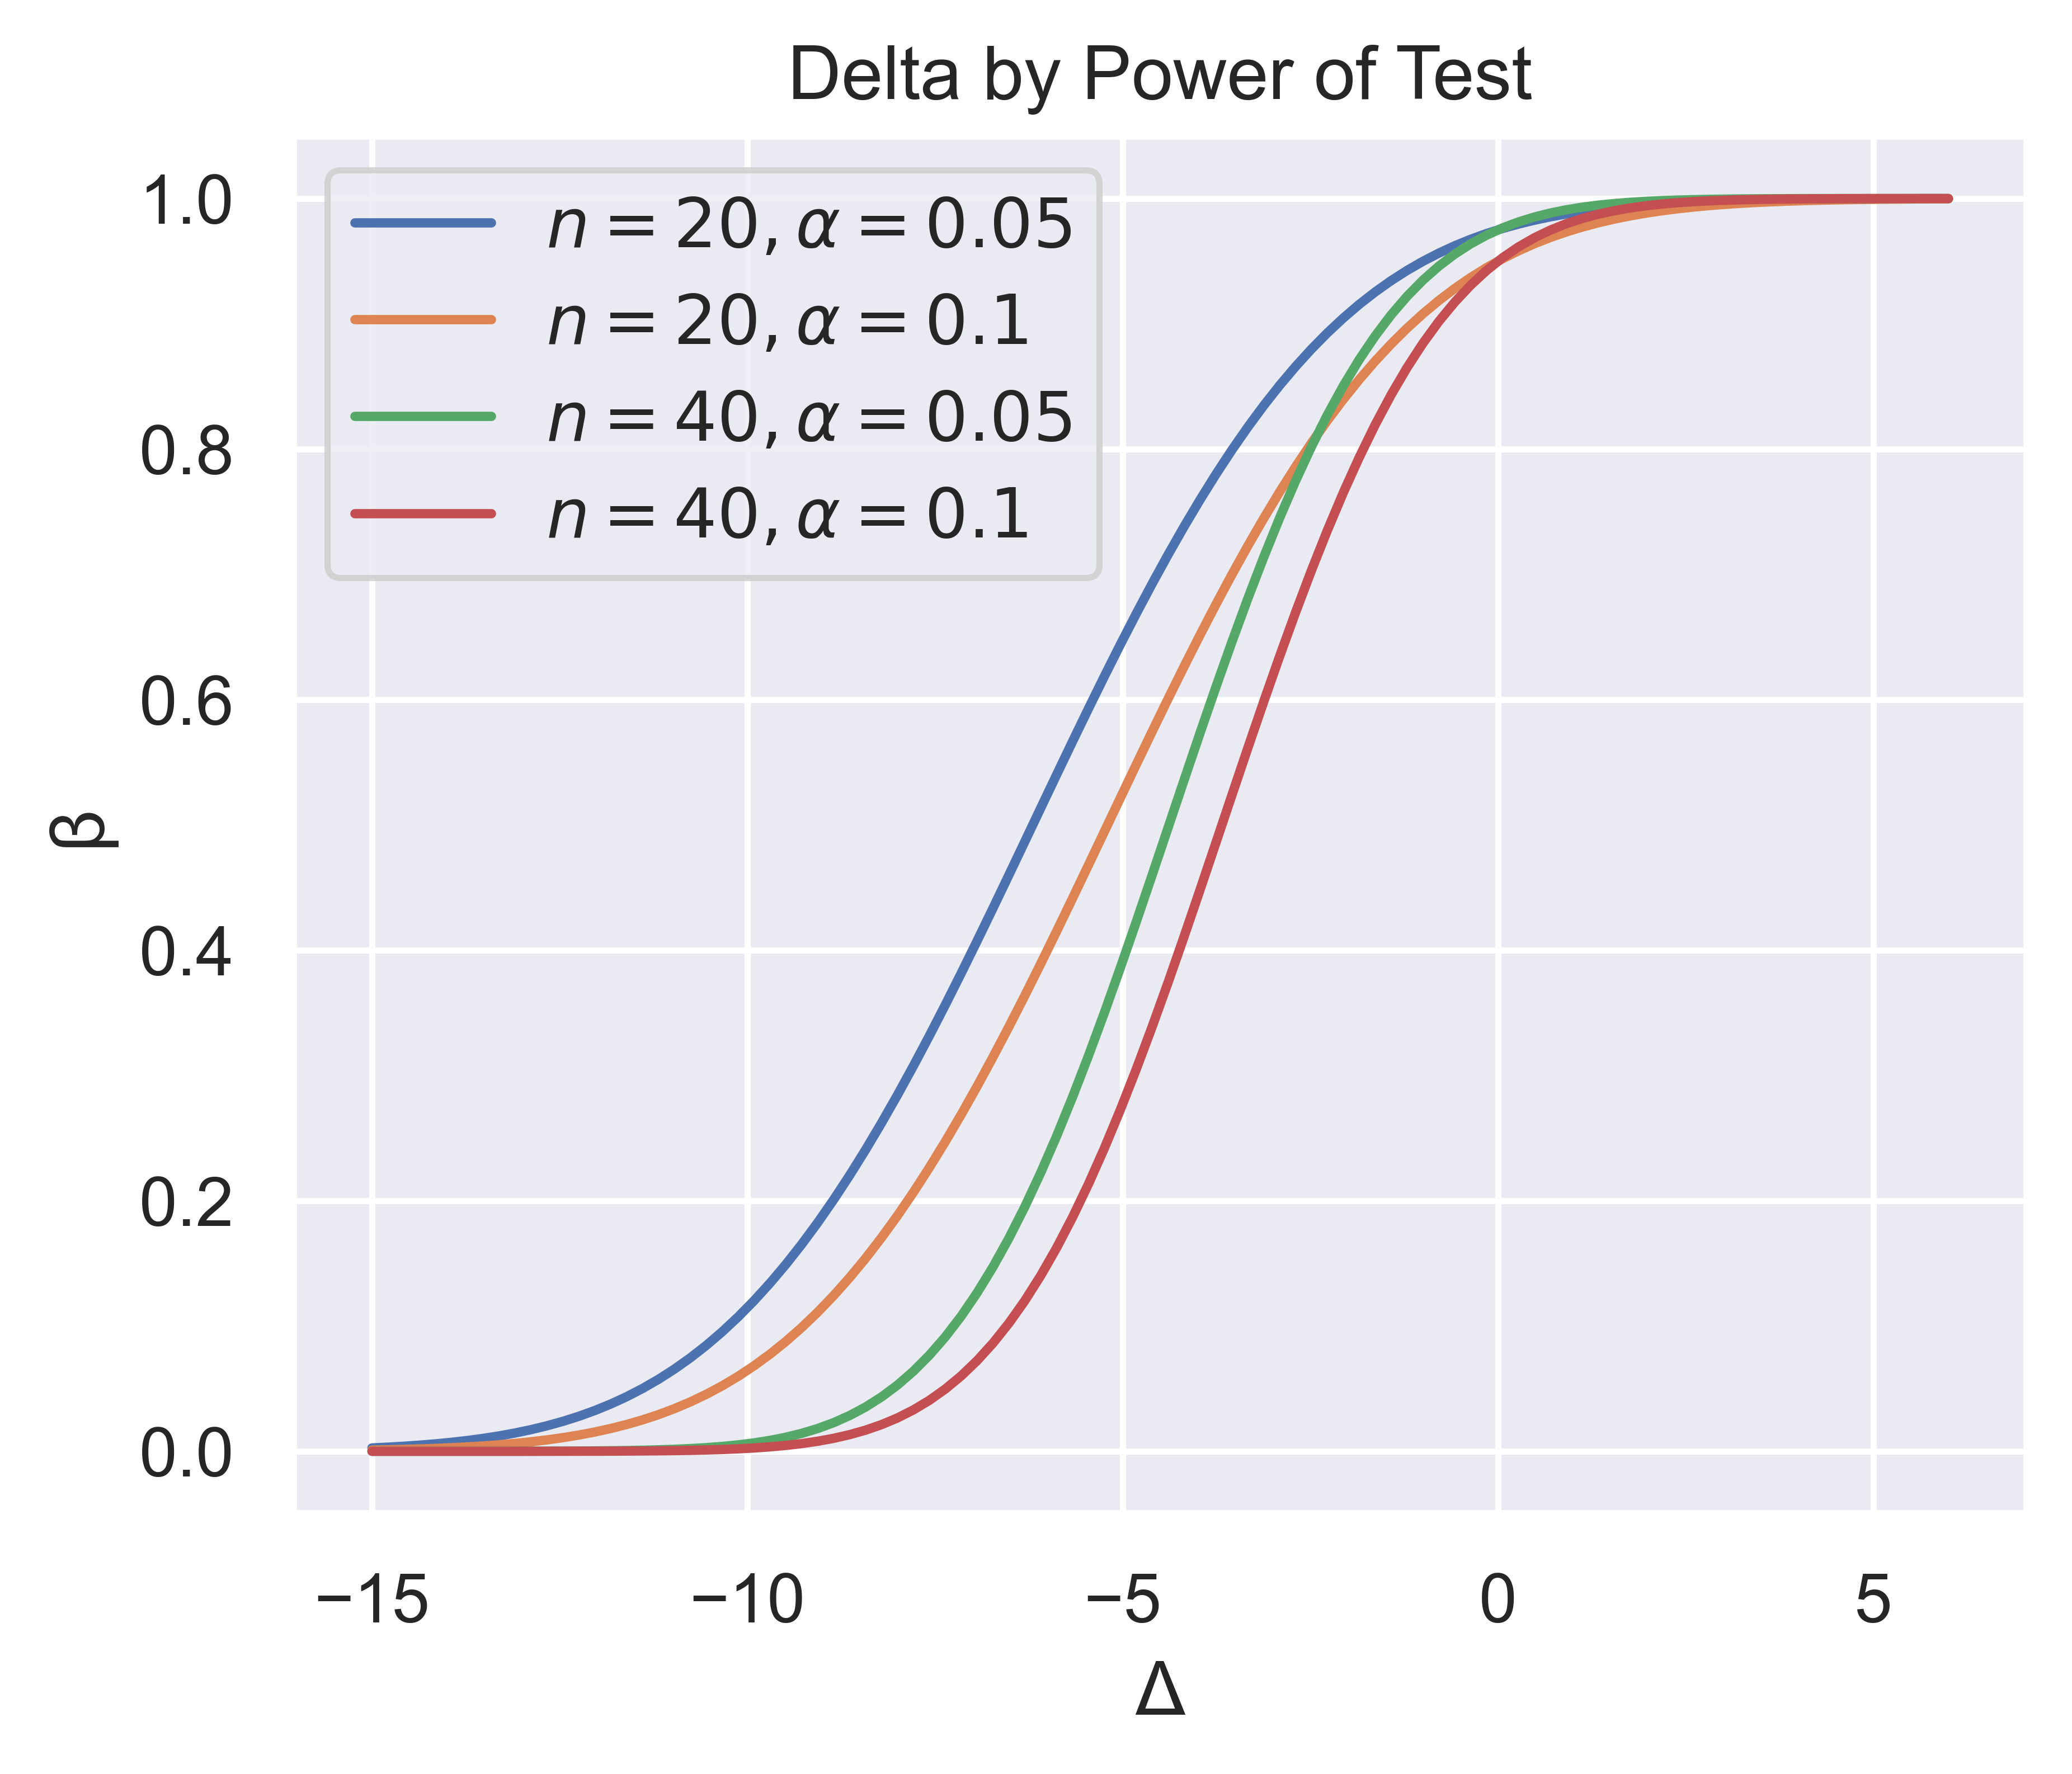

In [105]:
xmin, xmax = -15, 6
x = np.linspace(xmin, xmax, 100)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), dpi=800)
alphas = [0.05, 0.10]
ns = [20, 40]
combs = chain.from_iterable([[(a, n) for a in alphas] for n in ns])
for a, n in combs:
    y = [two_side_beta(a, n, z) for z in x]
    ax.plot(x, y, label=f"$n = {n}, α = {a}$")
plt.legend()
plt.title("Delta by Power of Test")
plt.ylabel("β")
plt.xlabel("Δ")

Larger sample sizes are associated with greater test power at lower $|\Delta|$.
Higher significance levels are associated with greater test power at lower $|\Delta|$.
Changing the sample size appears to have a more meaningful impact on the power of the underlying test, as shown by the steeper slopes when $n = 40$.

# 7
#### An experiment was done to measure the effects of ozone, a component of smog. A group of 22 seventy-day-old rats were kept in an environment containing ozone for 7 days, and their weight gains were recorded. Another group of 23 rats of a similar age were kept in an ozone-free environment for a similar time, and their weight gains were recorded. The data (in grams) are given below. Analyze the data to determine the effect of ozone. Write a summary of your conclusions.

In [106]:
ozone = array([10.1, 6.1, 20.4, 7.3, 14.3, 15.5, -9.9, 6.8, 28.2, 17.9, -12.9, 14.0, 6.6, 12.1, 15.7, 39.9, -15.9, 54.6, -14.7, 44.1, -9.0, -9.0])
ctrls = array([41.0, 38.4, 24.9, 25.9, 21.9, 18.3, 13.1, 27.3, 28.5, -16.9, 17.4, 21.8, 15.4, 27.4, 19.2, 22.4, 17.7, 26.0, 29.4, 21.4, 22.7, 26.0, 26.6])
labels = ["Ozone", "Control"]

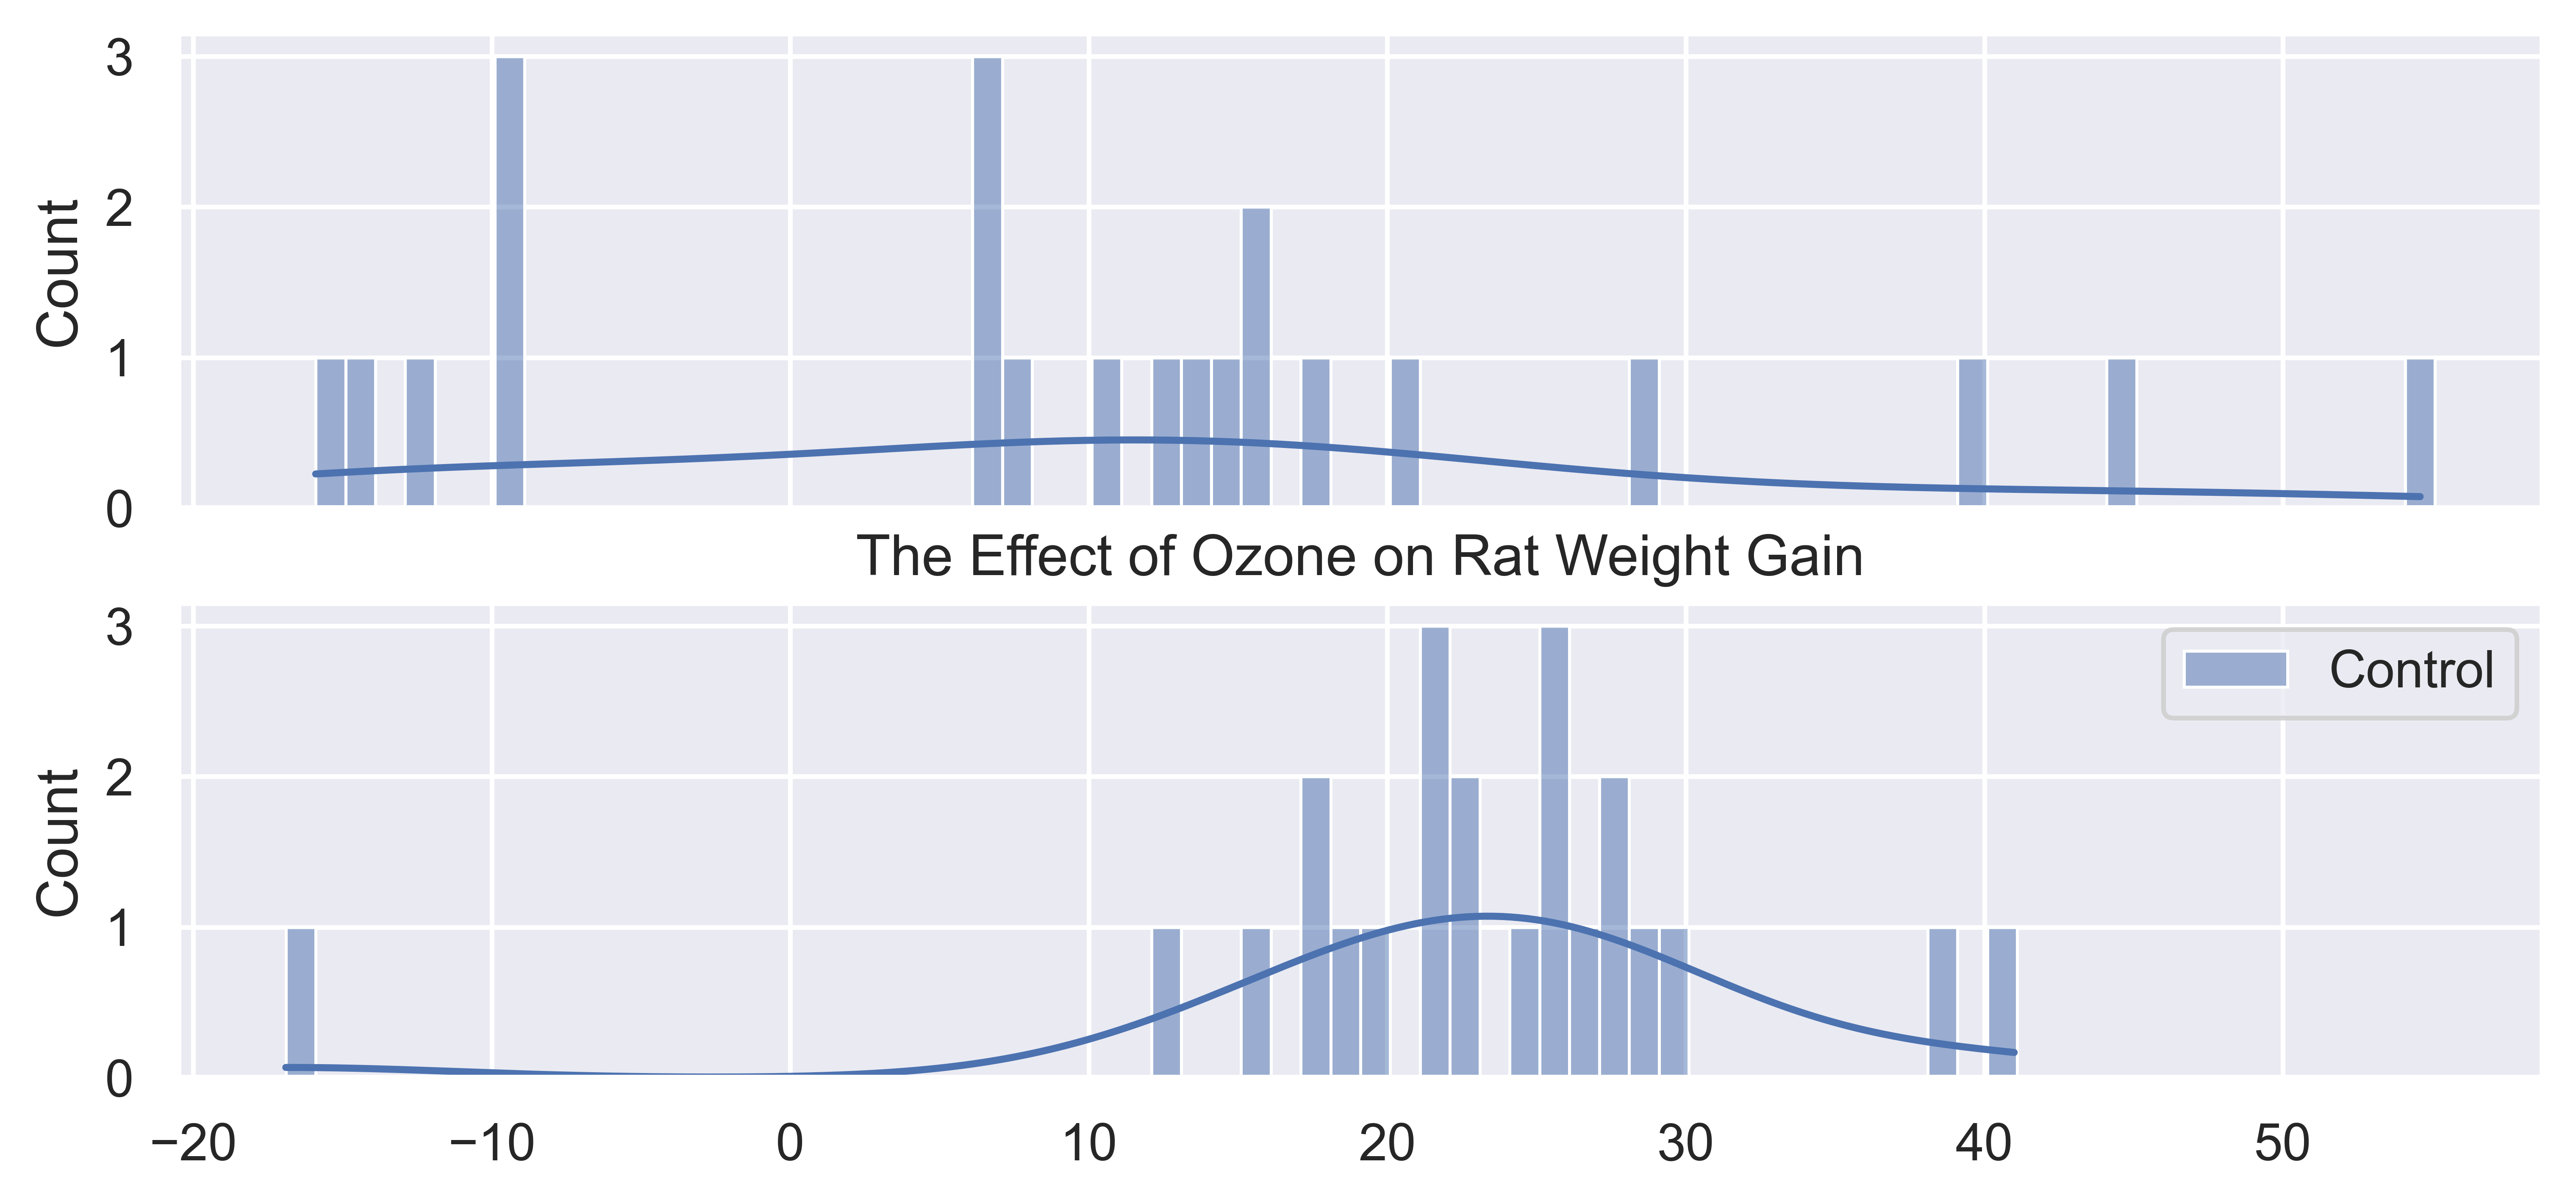

In [107]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9,4), dpi=800, sharex=True, sharey=True)

for i, group in enumerate([ozone, ctrls]):
    sns.histplot(group, bins=len(ctrls), ax=axs[i], kde=True, binwidth=1, label=labels[i])
plt.title("The Effect of Ozone on Rat Weight Gain")
plt.legend()

- Looking at the histogram, an assumption of normality is not unreasonable. Prior knowledge also suggests that population values of organisms' attributes tend to be approximately normally distributed. 
- I'll therefore conduct a two-sided ttest to assess whether a significant difference in rat weight change is shown by these samples.
- $H_{0}: \mu_{1} = \mu_{2}$
- $H_{1}: \mu_{1} \neq \mu_{2}$

In [108]:
stats.ttest_ind(ozone, ctrls, alternative="two-sided")

Ttest_indResult(statistic=-2.49188745102729, pvalue=0.016641088971478594)

- At a significance level of 0.01, I cannot reject the null hypothesis that the means are approximately equal.

# 8
#### An experiment was done to test a method for reducing faults on telephone lines (Welch 1987). Fourteen matched pairs of areas were used. The following table shows the fault rates for the control areas and for the test areas:

In [109]:
test = text_to_int_array("676 206 230 256 280 433 337 466 497 512 794 428 452 512")
ctrl = text_to_int_array("88 570 605 617 653 2913 924 286 1098 982 2346 321 615 519")
labels = ["Test", "Control"]

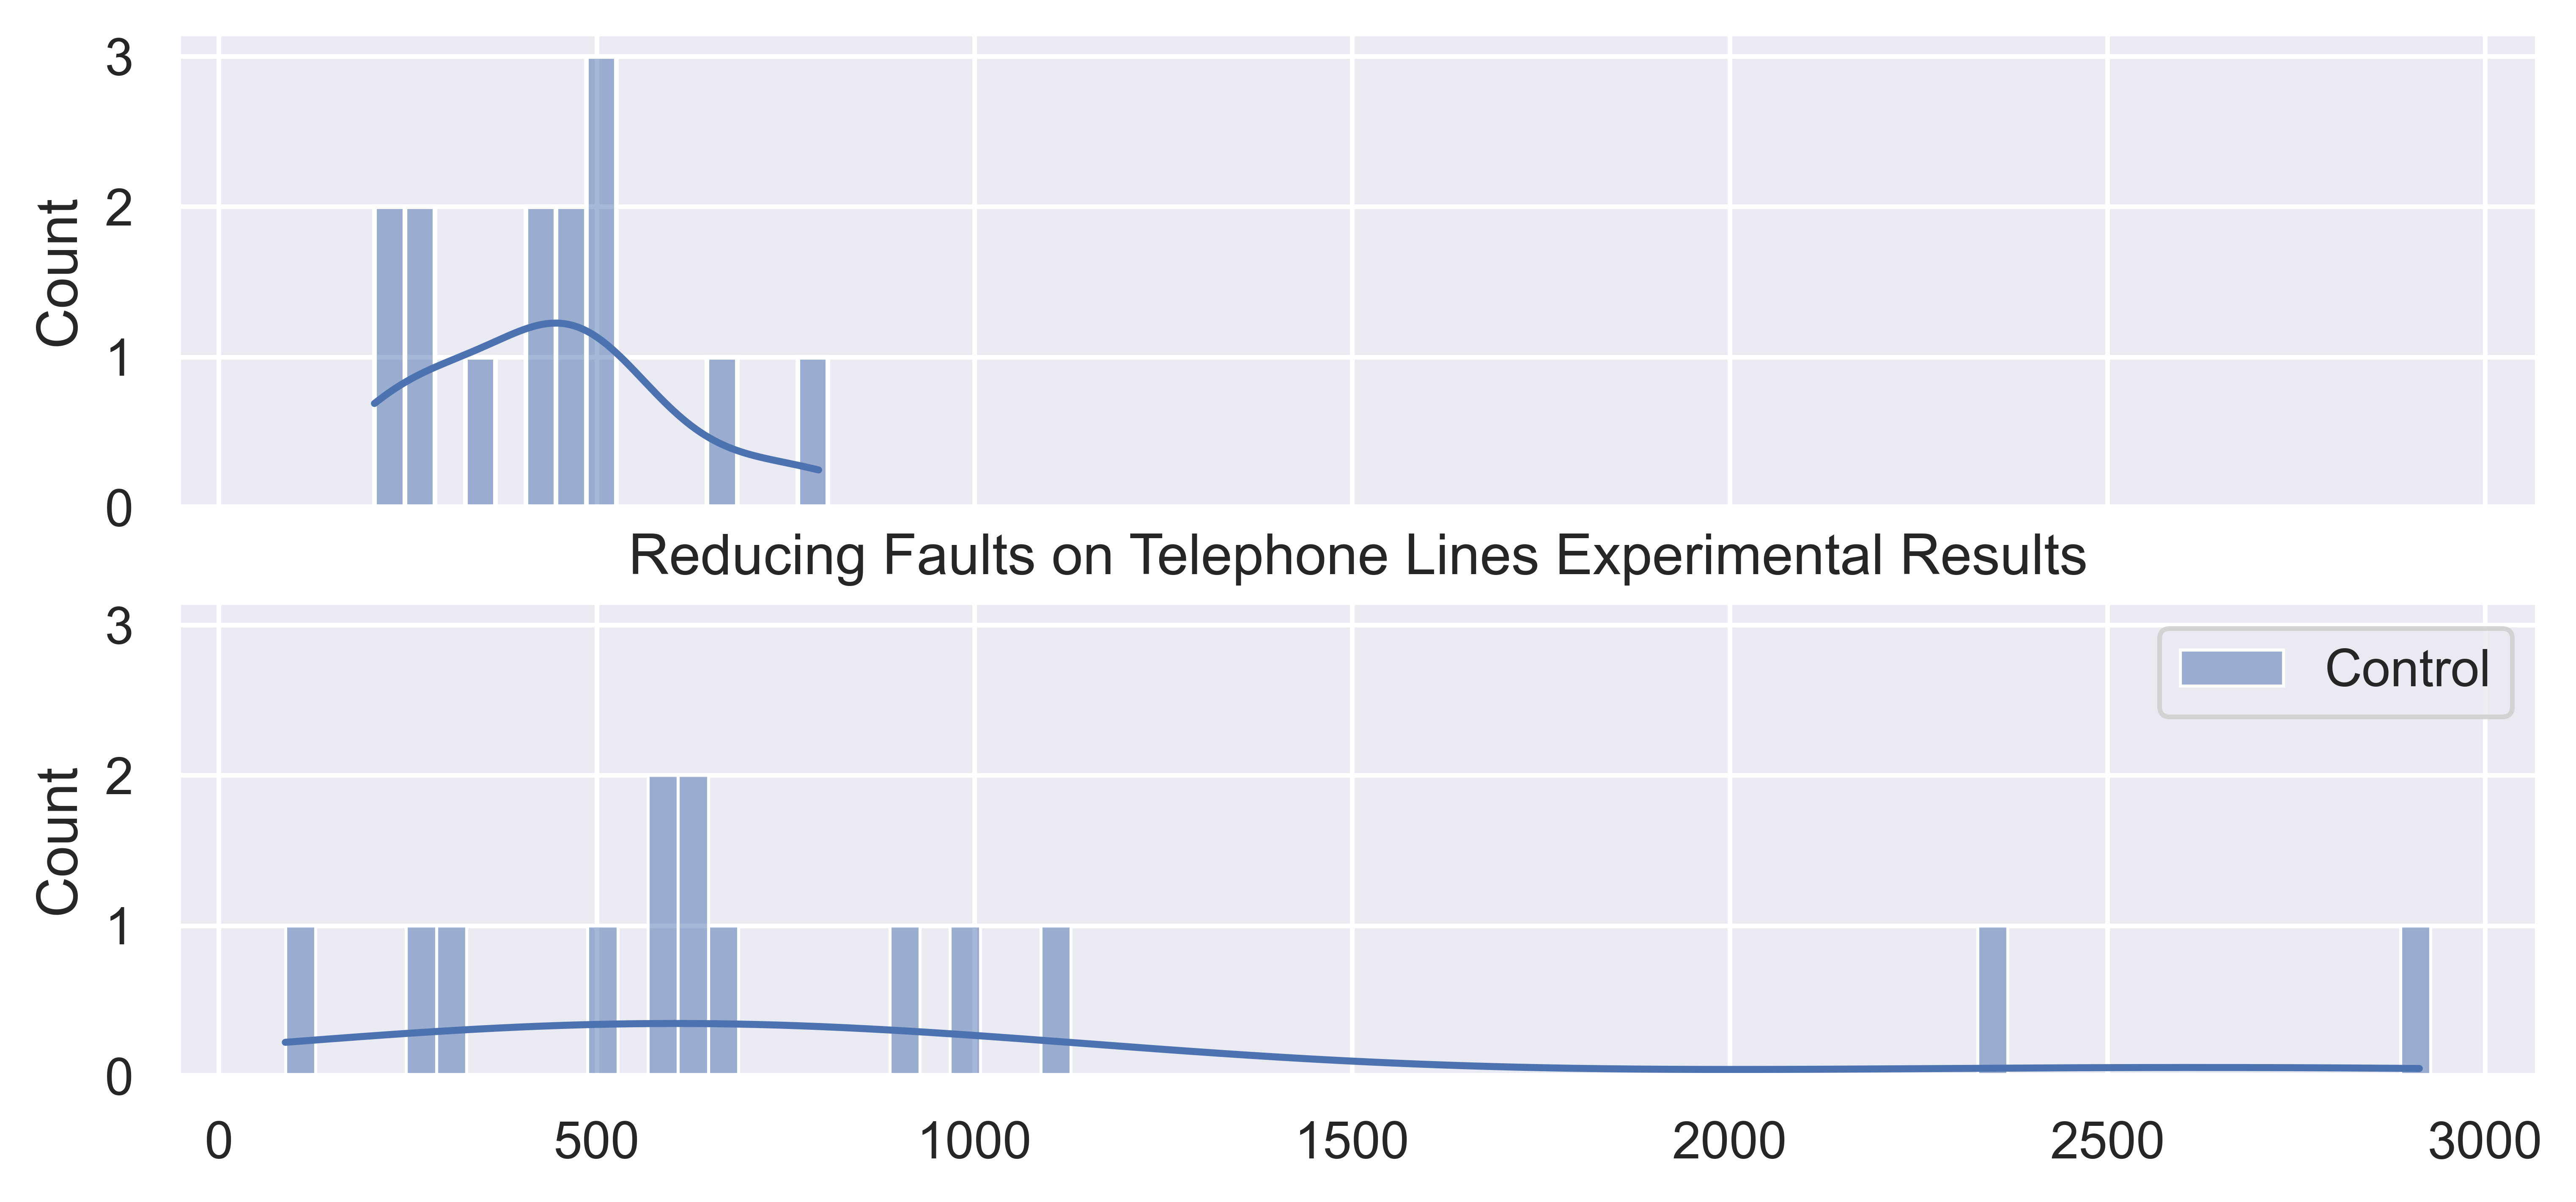

In [110]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9,4), dpi=800, sharex=True, sharey=True)

for i, group in enumerate([test, ctrl]):
    sns.histplot(group, bins=len(test), ax=axs[i], kde=True, binwidth=40, label=labels[i])
plt.title("Reducing Faults on Telephone Lines Experimental Results")
plt.legend()

#### Do you think it is more appropriate to use a t test or a nonparametric method to test whether the apparent difference between test and control could be due to chance? Why? Carry out both tests and compare.

- In this case, I think it makes more sense to use a non-parametric test. 
- The sample sizes are small, meaning that it's difficult to justify an assumption of normality. 
- However, the experiment is being done on pairs of areas, meaning that it's reasonable to think that the samples would be similarly distributed.
- $H_{0}: \mu_{1} = \mu_{2}$
- $H_{1}: \mu_{1} > \mu_{2}$


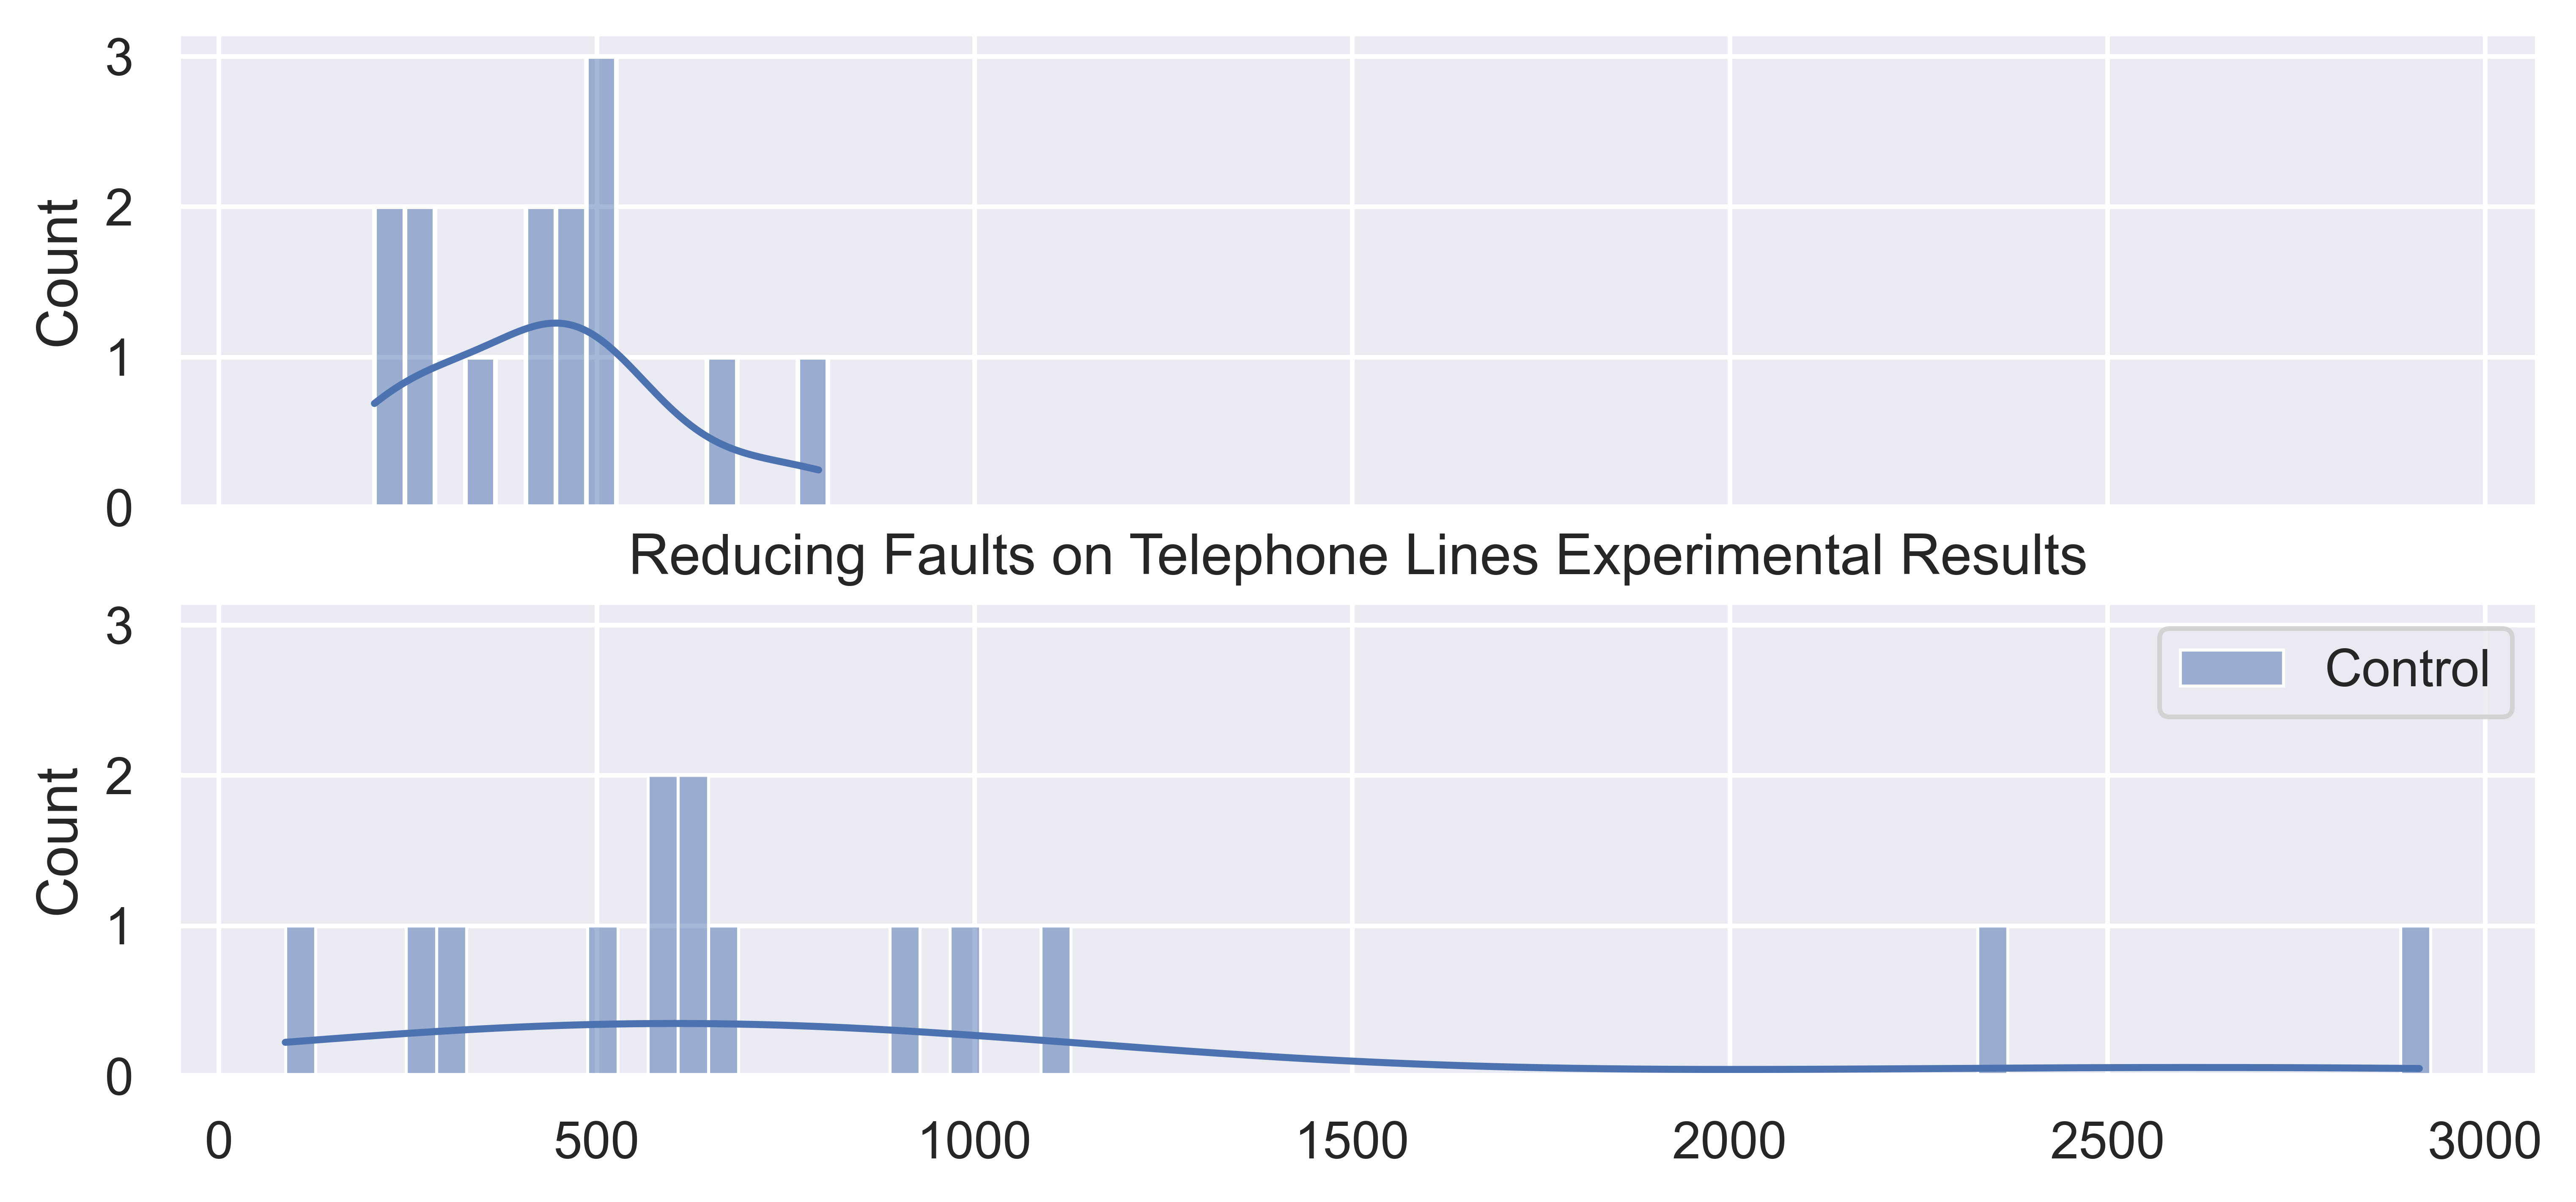

In [111]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9,4), dpi=800, sharex=True, sharey=True)

for i, group in enumerate([test, ctrl]):
    sns.histplot(group, bins=len(test), ax=axs[i], kde=True, binwidth=40, label=labels[i])
plt.title("Reducing Faults on Telephone Lines Experimental Results")
plt.legend()

In [112]:
ttest_res = stats.ttest_rel(test, ctrl, alternative="less")
ttest_res

TtestResult(statistic=-2.2775825666787854, pvalue=0.02014947961798259, df=13)

In [113]:
npara_res = stats.wilcoxon(test, ctrl, alternative="less")
npara_res

WilcoxonResult(statistic=17.0, pvalue=0.01226806640625)

- Both the non-parameteric and ttest returned similar results, though the non-parametric method produced a lower p-value.
- At a significance level of 0.05, the null hypothesis would be rejected in favor of the conclusion that the intervention produces a significant effect in the reduction of faults on telephone lines. 